In [2]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## To Visualize the Decision Tree Model
from sklearn import tree

### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving winedataset.csv to winedataset.csv


In [4]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['winedataset.csv']))
dataset.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [5]:
dataset['quality'].value_counts()

5    577
6    535
9    247
Name: quality, dtype: int64

## <span style='color:red '>4.0 Splitting data into independent and dependent features</span>

In [6]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
X.head(3)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


In [7]:
y.head(3)

0    5
1    5
2    5
Name: quality, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=10)

In [9]:
X_train.head(3)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
341,390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9
567,654,8.6,0.47,0.47,2.4,0.074,7.0,29.0,0.9979,3.08,0.46,9.5
769,895,7.1,0.59,0.01,2.3,0.080,27.0,43.0,0.9955,3.42,0.58,10.7


In [10]:
y_train.head(3)

341    9
567    5
769    6
Name: quality, dtype: int64

In [11]:
X_test.head(3)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
857,1008,8.9,0.350,0.40,3.6,0.110,12.0,24.0,0.99549,3.23,0.70,12.0
993,1163,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.0
596,689,8.1,0.380,0.48,1.8,0.157,5.0,17.0,0.99760,3.30,1.05,9.4


In [12]:
y_test.head(3)

857    9
993    5
596    5
Name: quality, dtype: int64

## <span style='color:red '>5.0 Feature Scaling for some models</span>

In [13]:
### Creating copy of test and training data for feature scaling
X_train1=X_train
X_train1.head(3)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
341,390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9
567,654,8.6,0.47,0.47,2.4,0.074,7.0,29.0,0.9979,3.08,0.46,9.5
769,895,7.1,0.59,0.01,2.3,0.080,27.0,43.0,0.9955,3.42,0.58,10.7


In [14]:
X_test1=X_test
X_test1.head(3)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
857,1008,8.9,0.350,0.40,3.6,0.110,12.0,24.0,0.99549,3.23,0.70,12.0
993,1163,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.0
596,689,8.1,0.380,0.48,1.8,0.157,5.0,17.0,0.99760,3.30,1.05,9.4


In [15]:
y_train1=y_train
y_train1.head(3)

341    9
567    5
769    6
Name: quality, dtype: int64

In [16]:
y_test1=y_test
y_test1.head(3)

857    9
993    5
596    5
Name: quality, dtype: int64

In [17]:
scalar=StandardScaler()
scalar

StandardScaler()

In [18]:
X_train1=scalar.fit_transform(X_train1)
X_train1

array([[-8.71732025e-01, -1.55901763e+00,  1.76931216e+00, ...,
         1.58656678e+00,  1.04003958e+00,  2.22677443e+00],
       [-3.00163819e-01,  1.33664887e-01, -3.07322897e-01, ...,
        -1.46311310e+00, -1.23393896e+00, -8.64908567e-01],
       [ 2.21608672e-01, -7.12676372e-01,  3.48456596e-01, ...,
         6.97076813e-01, -4.75946114e-01,  2.26273669e-01],
       ...,
       [-4.01920280e-01,  2.46510388e-01, -2.52674606e-01, ...,
        -1.80815989e-03, -7.91776467e-01,  4.44099629e-02],
       [ 1.21968800e+00, -1.27690388e+00, -1.01775068e+00, ...,
         3.15866828e-01, -1.36027110e+00, -3.19317449e-01],
       [ 1.57258807e+00, -9.94790125e-01,  9.49587798e-01, ...,
         8.24146808e-01, -4.75946114e-01, -2.28385596e-01]])

In [19]:
X_test1=scalar.transform(X_test)
X_test1

array([[ 0.46625718,  0.30293314, -0.96310239, ..., -0.51008814,
         0.28204673,  1.40838776],
       [ 0.801837  ,  0.35935589,  1.41409827, ..., -0.12887815,
         0.09254852, -0.4102493 ],
       [-0.22438773, -0.14844887, -0.79915752, ..., -0.06534316,
         2.4928592 , -0.95584042],
       ...,
       [ 0.74987626, -0.09202612, -0.08872973, ...,  0.18879683,
        -0.09694969, -0.86490857],
       [-1.24411737, -0.48698537, -0.19802631, ...,  0.50647182,
        -0.7286104 , -0.68304486],
       [-1.59485241,  1.0364289 , -0.58056435, ..., -1.71725309,
        -0.16011576, -0.77397671]])

## <span style='color:red '>7.0 Hyper-Parameter Tuning of Model</span>

### <span style='color:red '>7.1 Hyper-Parameter Tuning Decision Tree Classifier Model</span>

In [35]:
dtc=DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [36]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']   
}

In [37]:
grid=GridSearchCV(estimator=dtc,param_grid=grid_param, cv=3)

In [38]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [39]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 17,
 'min_samples_leaf': 9,
 'min_samples_split': 3,
 'splitter': 'random'}

In [40]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=17, min_samples_leaf=9, min_samples_split=3,
                       splitter='random')

In [45]:
dtc_best_par=DecisionTreeClassifier(criterion='entropy',max_depth=17, min_samples_leaf=9, min_samples_split=3, splitter='random')
dtc_best_par

DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_leaf=9,
                       min_samples_split=3, splitter='random')

In [46]:
dtc_best_par.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_leaf=9,
                       min_samples_split=3, splitter='random')

In [47]:
dtc_best_par_pred=dtc_best_par.predict(X_test)
dtc_best_par_pred

array([6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5,
       6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 5, 9, 6, 6,
       5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 9, 5, 6, 5, 5, 9, 6, 5, 6,
       5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 9,
       5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 9, 6, 5, 5, 5, 5, 6, 6, 5, 6,
       5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 9, 9, 5, 6, 5, 5, 6, 6,
       5, 5, 9, 5, 5, 5, 5, 9, 6, 5, 9, 6, 6, 5, 5, 6, 5, 9, 6, 9, 6, 9,
       6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6,
       9, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6,
       6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 9, 5, 9, 5, 6, 6, 5, 5, 5, 6, 6, 9,
       5, 5, 5, 5, 6, 6, 6, 5, 5, 9, 5, 5, 6, 6, 6, 6, 9, 5, 5, 5, 5, 5,
       5, 6, 6, 9, 5, 9, 5, 5, 6, 5, 6, 6, 6, 9, 6, 9, 6, 9, 6, 6, 5, 5,
       6, 5, 5, 9, 5, 6, 6, 6, 6, 6, 5, 9, 5, 9, 6, 5, 5, 9, 6, 6, 5, 9,
       5, 6, 5, 5, 5, 5, 5, 9, 6, 5, 5, 5, 9, 5, 5,

In [48]:
print(classification_report(y_test,dtc_best_par_pred ))

              precision    recall  f1-score   support

           5       0.58      0.70      0.63       145
           6       0.48      0.48      0.48       129
           9       0.44      0.24      0.31        66

    accuracy                           0.53       340
   macro avg       0.50      0.47      0.48       340
weighted avg       0.51      0.53      0.51       340



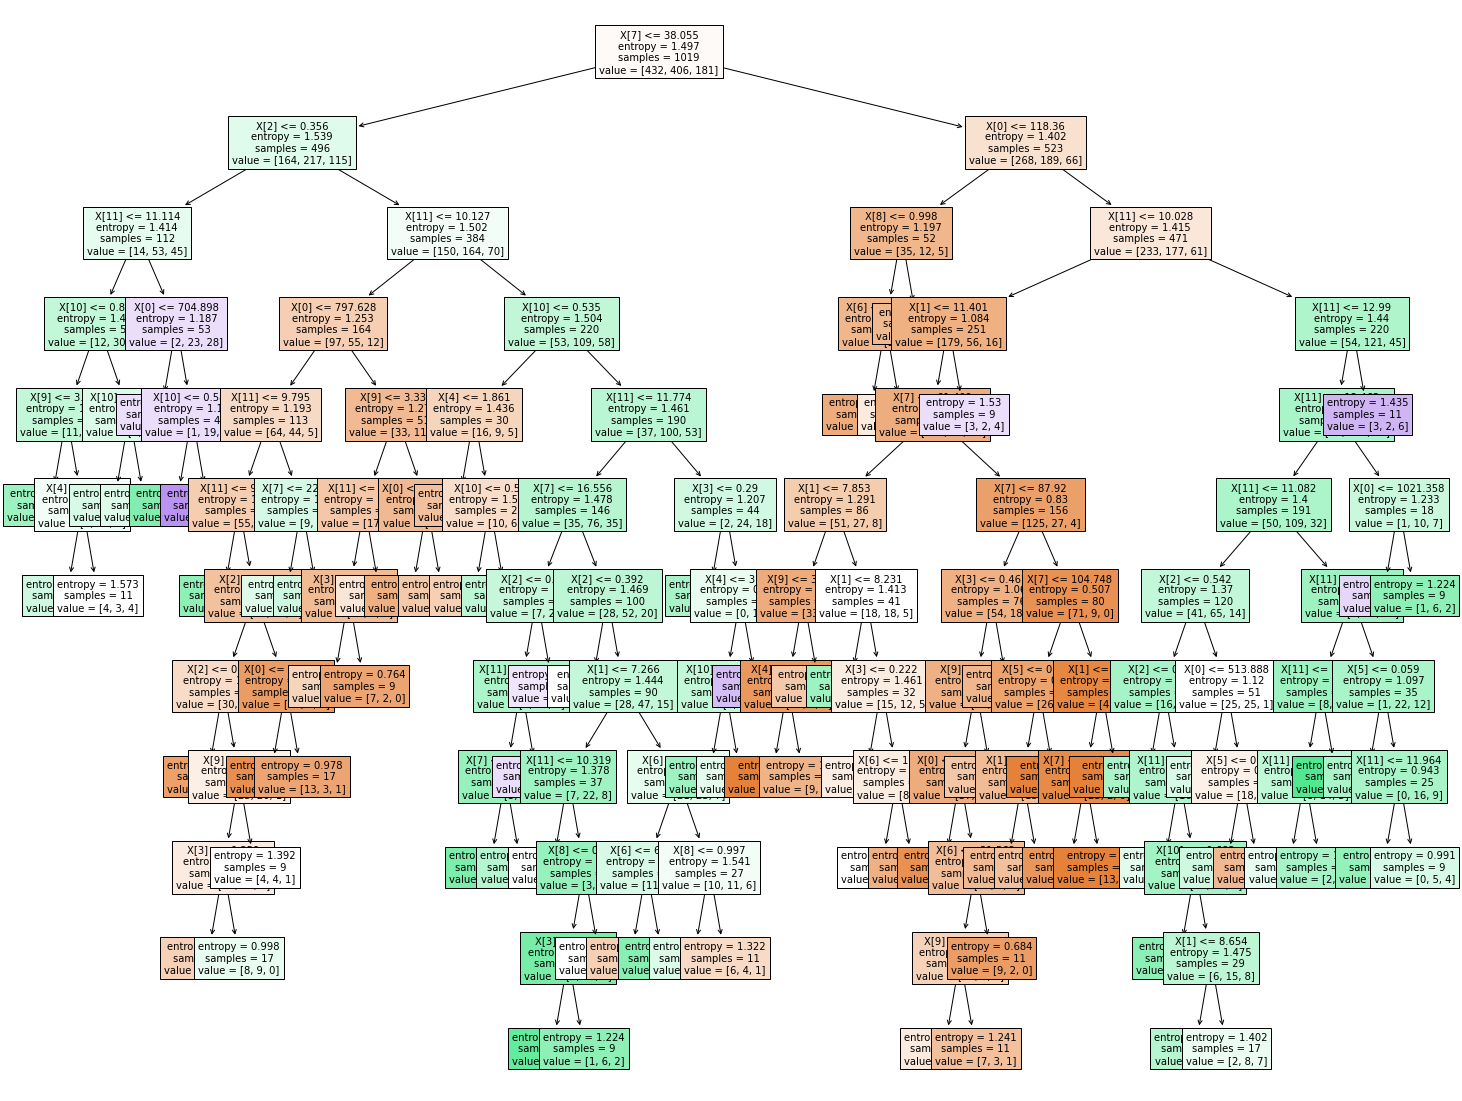

In [49]:
fig = plt.figure(figsize=(25,20))
clf = dtc_best_par.fit(X_train, y_train)
tree.plot_tree(clf, filled=True, fontsize=10)
plt.show();

### <span style='color:red '>7.2 Hyper-Parameter Tuning Logistic Regression Model</span>

In [50]:
log_reg=LogisticRegression()
log_reg

LogisticRegression()

In [70]:
grid_param = {
    "penalty" : ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 3),
    "solver": ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter' : [100, 200]
}

In [71]:
grid=GridSearchCV(estimator=log_reg,param_grid=grid_param, verbose=1, cv=2)

In [72]:
grid.fit(X_train1, y_train1)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-04, 1.e+00, 1.e+04]),
                         'max_iter': [100, 200],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             verbose=1)

In [73]:
grid.best_params_

{'C': 1.0, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}

In [74]:
grid.best_estimator_

LogisticRegression(max_iter=200, penalty='l1', solver='saga')

In [75]:
log_reg_best_par=LogisticRegression(max_iter=200, penalty='l1', solver='saga')
log_reg_best_par

LogisticRegression(max_iter=200, penalty='l1', solver='saga')

In [76]:
log_reg_best_par.fit(X_train1, y_train1)

LogisticRegression(max_iter=200, penalty='l1', solver='saga')

In [77]:
log_reg_best_par_pred=log_reg_best_par.predict(X_test1)
log_reg_best_par_pred

array([6, 5, 6, 5, 6, 6, 5, 6, 6, 9, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5,
       6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5,
       5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 9, 5, 6, 5, 6, 9, 6, 5, 9,
       5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6,
       5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 9, 6, 5, 5, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 9, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6,
       6, 9, 5, 9, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 9,
       9, 6, 6, 5, 9, 5, 9, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5,
       6, 6, 6, 9, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 9, 6,
       5, 6, 5, 5, 5, 6, 6, 6, 6, 9, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 6, 6, 5, 9, 6, 5, 6, 5, 6, 6, 6, 6, 6, 9, 6, 9, 6, 6, 6, 6,
       5, 6, 6, 9, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 6, 6, 5, 6,
       5, 6, 5, 6, 5, 5, 9, 6, 6, 6, 5, 6, 6, 9, 6,

In [78]:
print(classification_report(y_test1,log_reg_best_par_pred))

              precision    recall  f1-score   support

           5       0.63      0.69      0.66       145
           6       0.50      0.61      0.55       129
           9       0.52      0.18      0.27        66

    accuracy                           0.56       340
   macro avg       0.55      0.49      0.49       340
weighted avg       0.56      0.56      0.54       340



### <span style='color:red '>7.3 Hyper-Parameter Tuning Support Vector Classifier Model</span>

In [120]:
svc=SVC()
svc

SVC()

In [113]:
grid_param={'C': [10, 100, 200, 500],
            'degree': [2, 3, 4, 5],
            'kernel': [ 'rbf', 'poly', 'sigmoid']
            }

In [114]:
grid=GridSearchCV(estimator=svc,param_grid=grid_param, verbose=1, cv=2)

In [115]:
grid.fit(X_train1, y_train1)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [10, 100, 200, 500], 'degree': [2, 3, 4, 5],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=1)

In [116]:
grid.best_params_

{'C': 10, 'degree': 3, 'kernel': 'poly'}

In [117]:
grid.best_estimator_

SVC(C=10, kernel='poly')

In [121]:
svc_best_par=SVC(C=10, kernel='poly')
svc_best_par

SVC(C=10, kernel='poly')

In [122]:
svc_best_par.fit(X_train1, y_train1)

SVC(C=10, kernel='poly')

In [123]:
svc_best_par_pred=svc_best_par.predict(X_test1)
svc_best_par_pred

array([9, 6, 5, 5, 9, 5, 5, 6, 6, 9, 5, 5, 6, 5, 5, 6, 6, 5, 9, 6, 6, 6,
       6, 5, 6, 5, 5, 6, 5, 6, 9, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 9, 5, 6, 6, 6, 9, 6, 6, 6,
       5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 9,
       9, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 9, 5, 6, 9, 6, 5, 6, 5, 5, 6, 6,
       5, 5, 9, 5, 6, 5, 9, 9, 5, 5, 9, 6, 5, 5, 5, 9, 5, 6, 5, 6, 6, 6,
       6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6,
       6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 9, 6, 9, 6,
       6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 9, 6, 6, 5, 9, 6, 5, 5, 5, 5, 9, 6,
       6, 6, 5, 5, 5, 6, 6, 6, 6, 9, 5, 5, 5, 6, 6, 5, 5, 5, 5, 9, 5, 5,
       5, 6, 6, 6, 5, 9, 5, 5, 6, 5, 9, 6, 6, 9, 6, 6, 6, 9, 6, 6, 6, 6,
       5, 5, 6, 9, 5, 6, 6, 6, 9, 6, 6, 6, 9, 6, 9, 6, 6, 9, 6, 6, 6, 6,
       5, 6, 5, 6, 5, 5, 6, 9, 6, 6, 5, 6, 9, 6, 6,

In [124]:
print(classification_report(y_test1,svc_best_par_pred ))

              precision    recall  f1-score   support

           5       0.62      0.66      0.64       145
           6       0.53      0.62      0.57       129
           9       0.50      0.29      0.37        66

    accuracy                           0.57       340
   macro avg       0.55      0.52      0.53       340
weighted avg       0.57      0.57      0.56       340



### <span style='color:red '>7.4 Hyper-Parameter Tuning Random Forest Classifier Model</span>

In [51]:
rand_for=RandomForestClassifier()
rand_for

RandomForestClassifier()

In [55]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,110],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,2),
    'min_samples_leaf' : range(1,10,2),
}

In [56]:
grid=GridSearchCV(estimator=rand_for,param_grid=grid_param, verbose=1, cv=2)

In [57]:
grid.fit(X_train, y_train)

Fitting 2 folds for each of 270 candidates, totalling 540 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(1, 10, 2),
                         'n_estimators': [90, 100, 110]},
             verbose=1)

In [58]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 18,
 'min_samples_leaf': 1,
 'n_estimators': 90}

In [59]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=18, n_estimators=90)

In [60]:
rand_for_best_par=RandomForestClassifier(criterion='entropy', max_depth=18, n_estimators=90)
rand_for_best_par

RandomForestClassifier(criterion='entropy', max_depth=18, n_estimators=90)

In [61]:
rand_for_best_par.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=18, n_estimators=90)

In [62]:
rand_for_best_par_pred=rand_for_best_par.predict(X_test)
rand_for_best_par_pred

array([9, 6, 6, 5, 9, 5, 5, 6, 6, 9, 5, 5, 6, 5, 5, 6, 5, 5, 9, 6, 5, 6,
       9, 5, 6, 5, 5, 6, 5, 6, 9, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 9, 5, 5, 5, 6, 9, 6, 5, 6,
       5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 9,
       5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 9, 5, 6, 9, 6, 5, 6, 5, 5, 6, 5,
       5, 5, 9, 5, 5, 5, 5, 9, 6, 5, 9, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6,
       6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6,
       9, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 9, 9, 9, 5,
       6, 6, 6, 9, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 9, 9, 5, 5, 5, 5, 6, 9,
       5, 6, 5, 5, 5, 6, 9, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5,
       5, 6, 9, 9, 5, 6, 6, 5, 6, 5, 6, 6, 6, 9, 6, 9, 6, 9, 6, 6, 5, 5,
       6, 6, 6, 6, 5, 6, 6, 6, 9, 6, 6, 6, 9, 6, 6, 5, 6, 9, 6, 6, 5, 6,
       5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 9, 5, 6,

In [63]:
print(classification_report(y_test,rand_for_best_par_pred ))

              precision    recall  f1-score   support

           5       0.66      0.74      0.70       145
           6       0.56      0.61      0.59       129
           9       0.53      0.29      0.37        66

    accuracy                           0.61       340
   macro avg       0.58      0.55      0.55       340
weighted avg       0.60      0.61      0.59       340

